In [1]:
from PIL import Image
import PIL
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [38]:
#preprocessing
def normalize_LR(x):
  return np.divide(np.array(x, dtype=np.float32), 255.)
def denormalize_LR_HR(input_data):
  input_data = (input_data +1)*127.5
  return input_data.astype(np.uint8)
def resize_images(img):
  img_width = 280 #change for model
  img_height = 200 #change for model
  downscale = 4
  resized_image = []
  resized_image_rgb = []

  resized_image.append(
          np.array(
              PIL.Image.fromarray(img).resize(
                [img_width//downscale, img_height//downscale], resample=PIL.Image.BICUBIC)))       
  return resized_image

(50, 70, 3)


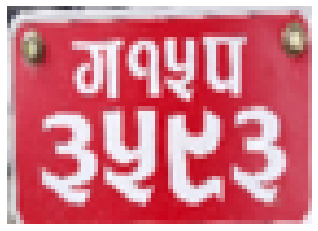

In [39]:
#loading
image1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/ALPR/SISR/Figure/scooter_lr.jpg")
image1 = image1[:,:, [2,1,0]]
imager = resize_images(image1)
print(imager[0].shape)
plt.axis(False)
img = plt.imshow(imager[0], interpolation='nearest')
imagen = normalize_LR(imager)

(1, 200, 280, 3)


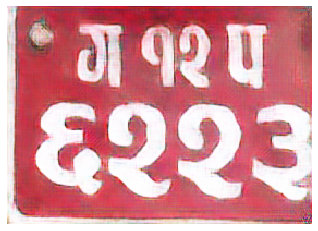

In [37]:
#model load and predict
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/ALPR/SISR/ALPR_Distorted/model_output_ALPR/gen_model_21_80.h5',compile=False) #change path for new model
gen_img = model1.predict(imagen)
print(gen_img.shape)
generated_image = denormalize_LR_HR(gen_img)
plt.axis(False)

Image.fromarray(generated_image[0]).save('/content/drive/MyDrive/Colab Notebooks/ALPR/SISR/Figure/bike_sr.jpg')
img = plt.imshow(generated_image[0], interpolation='nearest')
# plt.plot()